In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
print(tf.keras.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = df.load_data()      #loading the Dataset

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[0:4]
# data is in pixel values

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
df

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

#### Shape of splitted Datasets

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### There are 70,000 images in the whole dataset

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
print("Maximum value in the given data instance: ",X_train[0].max())
print("Minimum value in the given data instance: ",X_train[0].min())

Maximum value in the given data instance:  255
Minimum value in the given data instance:  0


#### Top 5 Examples in the trainning Data:

Actual Value in the image:  5


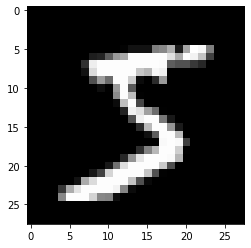

Actual Value in the image:  0


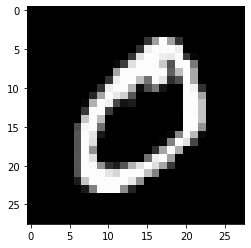

Actual Value in the image:  4


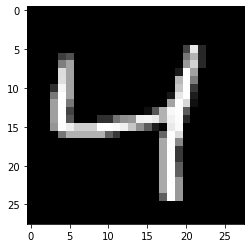

Actual Value in the image:  1


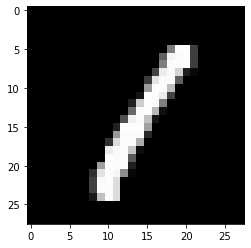

Actual Value in the image:  9


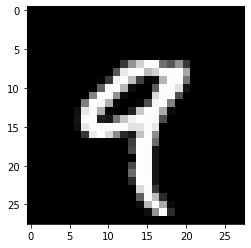

In [ ]:
for i in range(0,5):
  print("Actual Value in the image: ",y_train[i])
  plt.imshow(X_train[i],cmap= "gray")
  plt.show()

### Normalization Of the Data:
##### Normalizing image step is required which ensures that each input parameter pixels has a similar data distribution. This makes convergence faster while training the network.

#### Method:1 (Min-Max Normalization)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Maximum value in the given data instance: ",X_train[0].max())
print("Minimum value in the given data instance: ",X_train[0].min())

Maximum value in the given data instance:  1.0
Minimum value in the given data instance:  0.0


In [ ]:
X_train[0:4]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### Building a simple Neural Network

In [ ]:
X_train.shape[1:3]

(28, 28)

In [ ]:
#Sequential groups the Dense layers

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=X_train.shape[1:3],name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model.add(tf.keras.layers.Dense(300,activation = "relu",name = "Hidden_Layer_1"))
model.add(tf.keras.layers.Dense(100,activation = "relu",name = "Hidden_Layer_2"))
model.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
## we use sparse_categorical_crossentropy loss function when there are two or more label classes.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


##### Here params represents the weights in the Neural Network
###### Input - Hidden Layer 1 has (784*300(number of nodes in the Hidden Layer)+300(number of weights connected to the bias unit in the Input Layer
###### Like this all the weights are connected to layer to layer

In [ ]:
history = model.fit(X_train,y_train,epochs =10,validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.0776 - val_accuracy: 0.9833
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0904 - val_accuracy: 0.9810
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.1155 - val_accuracy: 0.9787
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0851 - val_accuracy: 0.9838
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.1016 - val_accuracy: 0.9812
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.1020 - val_accuracy: 0.9813
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.1119 - val_accuracy:

#### Here trainning accuracy is more than the validation accuracy so there is presence of OVERFITTING in our model 

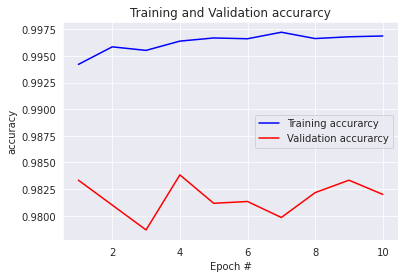

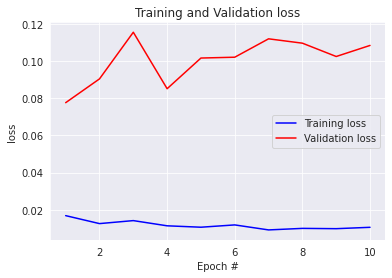

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9791


[0.1186893954873085, 0.9790999889373779]

In [ ]:
y_pred = model.predict(X_test,batch_size = 32)

In [ ]:
y_pred

array([[4.0984057e-24, 7.7413815e-17, 5.4781308e-22, ..., 1.0000000e+00,
        2.0150774e-21, 1.3980305e-14],
       [3.1813490e-14, 2.5499904e-13, 1.0000000e+00, ..., 7.1819071e-23,
        4.9116124e-15, 1.9094306e-22],
       [6.1140296e-13, 1.0000000e+00, 7.8129565e-09, ..., 4.0763562e-10,
        4.3144299e-12, 2.4341899e-15],
       ...,
       [7.2885007e-22, 5.4664144e-24, 1.3610626e-30, ..., 6.0910482e-22,
        4.4898353e-22, 4.6306505e-12],
       [4.0944654e-25, 7.6894431e-30, 2.4047710e-34, ..., 1.4496216e-17,
        4.5851984e-14, 5.7967357e-20],
       [7.9337701e-16, 7.4521317e-28, 1.0257781e-23, ..., 9.1113789e-34,
        4.3960459e-22, 2.1046817e-21]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
# argmax Returns the indices of the maximum values along an axis.

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Model Hypothesis Value in the image:  7


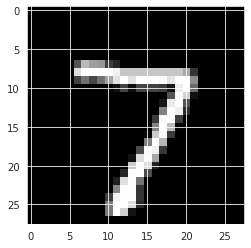

Model Hypothesis Value in the image:  2


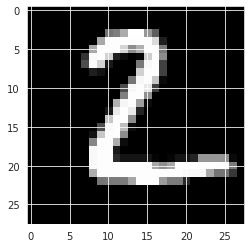

Model Hypothesis Value in the image:  1


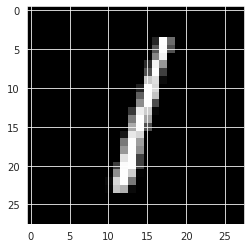

Model Hypothesis Value in the image:  0


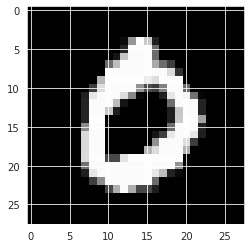

Model Hypothesis Value in the image:  4


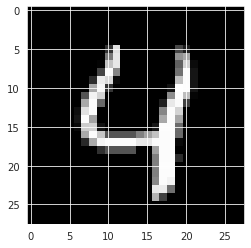

In [ ]:
for i in range(0,5):
  print("Model Hypothesis Value in the image: ",y_pred[i])
  plt.imshow(X_test[i],cmap= "gray")
  plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)

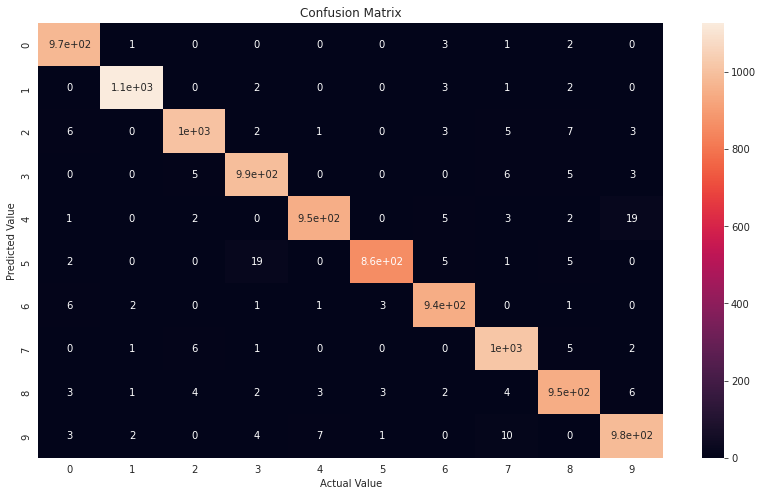

In [ ]:
plt.figure(figsize = (14,8))
sns.heatmap(cm,annot = True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix")
plt.show()

#### From the above Heatmap our model is difficult to classificy 3,9 Hand Written images

In [ ]:
print("classification_report : ")
print(classification_report(y_test,y_pred))

classification_report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9791


#### Checking our model

In [ ]:
def image_show(X,y,index):
  print("Value in the image: ",y[index])
  plt.imshow(X[index],cmap= "gray")
  plt.show()

In [ ]:
y_pred[:9]

# These are the predicted labels done by our model

array([7, 2, 1, 0, 4, 1, 4, 9, 6])

Value in the image:  9


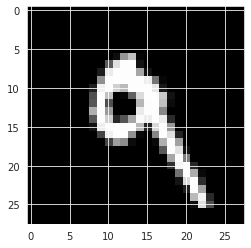

In [ ]:
image_show(X_test,y_test,7)

Value in the image:  7


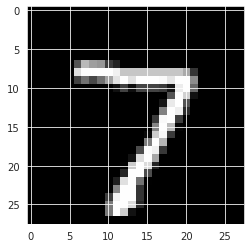

In [ ]:
image_show(X_test,y_test,0)